#### load libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#### declare arguments

In [120]:
## Demographics ## 
ppagecat = {1:'18-24',2:'25-34',3:'35-44',4:'45-54',5:'55-64',6:'65-74',7:'75+',99:'Under 18'}
ppeducat = {-2:'Not asked',-1:'REFUSED'
            ,1:'Less than high school'
            ,2:'High school'
            ,3:'Some college'
            ,4:'Bachelor\'s degree or higher'}
ppgender = {-2:'Not asked',-1:'REFUSED',1:'Male',2:'Female'}
ppincimp = {-2:'Not asked',-1:'REFUSED'
            ,1 :'<$5,000'
            ,2 :'$5,000 to $7,499'
            ,3 :'$7,500 to $9,999'
            ,4 :'$10,000 to $12,499'
            ,5 :'$12,500 to $14,999'
            ,6 :'$15,000 to $19,999'
            ,7 :'$20,000 to $24,999'
            ,8 :'$25,000 to $29,999'
            ,9 :'$30,000 to $34,999'
            ,10: '$35,000 to $39,999'
            ,11: '$40,000 to $49,999'
            ,12: '$50,000 to $59,999'
            ,13: '$60,000 to $74,999'
            ,14: '$75,000 to $84,999'
            ,15: '$85,000 to $99,999'
            ,16: '$100,000 to $124,999'
            ,17: '$125,000 to $149,999'
            ,18: '$150,000 to $174,999'
            ,19: '>=$175,000'}
ppmarit =  {-2: 'Not asked'
            ,-1: 'REFUSED'
            ,1 :'Married'
            ,2 :'Widowed'
            ,3 :'Divorced'
            ,4 :'Separated'
            ,5: 'Never married'
            ,6: 'Living with partner'}
ppreg9 = {1: 'New England'
            ,2: 'Mid-Atlantic'
            ,3: 'East-North Central'
            ,4: 'West-North Central' 
            ,5: 'South Atlantic'
            ,6: 'East-South Central' 
            ,7: 'West-South Central'
            ,8: 'Mountain'
            ,9: 'Pacific'}
core_par = {-2:'Not asked'
            ,-1: 'Refused'
            ,0: 'No'
            ,1: 'Yes'}
ppstaten = {-2: 'Not asked'
            ,-1: 'REFUSED'
            ,11: 'ME'
            ,12: 'NH' 
            ,13: 'VT' 
            ,14: 'MA' 
            ,15: 'RI' 
            ,16: 'CT' 
            ,21: 'NY' 
            ,22: 'NJ' 
            ,23: 'PA' 
            ,31: 'OH' 
            ,32: 'IN'
            ,33: 'IL' 
            ,34: 'MI' 
            ,35: 'WI' 
            ,41: 'MN' 
            ,42: 'IA' 
            ,43: 'MO' 
            ,44: 'ND' 
            ,45: 'SD' 
            ,46: 'NE' 
            ,47: 'KS' 
            ,51: 'DE' 
            ,52: 'MD' 
            ,53: 'DC' 
            ,54: 'VA' 
            ,55: 'WV' 
            ,56: 'NC' 
            ,57: 'SC' 
            ,58: 'GA' 
            ,59: 'FL' 
            ,61: 'KY' 
            ,62: 'TN' 
            ,63: 'AL' 
            ,64: 'MS' 
            ,71: 'AR' 
            ,72: 'LA' 
            ,73: 'OK' 
            ,74: 'TX' 
            ,81: 'MT' 
            ,82: 'ID' 
            ,83: 'WY' 
            ,84: 'CO'
            ,85: 'NM' 
            ,86: 'AZ' 
            ,87: 'UT' 
            ,88: 'NV' 
            ,91: 'WA' 
            ,92: 'OR' 
            ,93: 'CA' 
            ,94: 'AK' 
            ,95: 'HI' 
            ,96: 'AS' 
            ,97: 'GU' 
            ,98: 'PR' 
            ,99: 'VI'}


## Questions ##
#DPES11
format_question = lambda x: '_'.join(x.lower().split())

DPES11= format_question('I develop strong emotions toward people I can rely on')
DPES11_DICT = {-1:'Refused'
                ,1: 'Strongly disagree'
                ,2: 'Disagree'
                ,3: 'Somewhat disagree'
                ,4: 'Neither agree nor disagree'
                ,5: 'Somewhat agree'
                ,6: 'Agree'
                ,7: 'Strongly agree'}

L9 = format_question('Parents should empower children as much as possible so that they may follow their dreams')
L9_DICT = DPES11_DICT

EPQ1 = format_question('Moral standards should be seen as individualistic what one person considers to be moral may be judged as immoral by another person')
EPQ1_DICT = {-1:'Refused'
                ,1: 'Strongly agree'
                ,2: 'Agree'
                ,3: 'Somewhat agree'
                ,4: 'Neither agree nor disagree'             
                ,5: 'Somewhat disagree'
                ,6: 'Disagree'
                ,7: 'Strongly disagree'}

#### parse data

In [121]:
surveys = pd.read_csv('MMdata_merged.csv')
surveys.head()

,CaseID,weight,tm_start,tm_finish,duration,C1,C2,C3,I1,I2,...,pppa0097,pppa0098,pppa0099,pppa0100,pppa0101,pppa0102,partyid7,pppa0005,pppa0006,ppp20072
0,2,1.05,3/10/2012,3/10/2012,46,3,3,3,2,3,...,0,0,0,0,0,0,3,1,2,5
1,3,2.60,3/10/2012,3/10/2012,39,4,2,3,1,2,...,0,0,0,0,1,0,5,1,1,5
2,4,0.69,3/10/2012,3/11/2012,1453,3,3,4,4,3,...,0,0,0,0,0,0,2,1,2,1
3,5,1.74,3/10/2012,3/10/2012,45,5,1,4,3,3,...,1,0,0,0,1,0,7,1,1,5
4,6,2.43,3/10/2012,3/10/2012,26,4,4,4,2,2,...,0,0,0,0,0,0,7,1,1,6


In [122]:
surveys.shape

(1519, 451)

In [123]:
new_surveys = pd.DataFrame(surveys[['weight','tm_start','tm_finish','duration']],index=surveys['CaseID'])

In [124]:
# Demographics
new_surveys['age_category'] = surveys['ppagecat'].apply(lambda x: ppagecat[x])
new_surveys['education_level'] = surveys['PPEDUCAT'].apply(lambda x: ppeducat[x])
new_surveys['gender'] = surveys['PPGENDER'].apply(lambda x: ppgender[x])
new_surveys['income_level'] = surveys['PPINCIMP'].apply(lambda x: ppincimp[x])
new_surveys['marital_status'] = surveys['PPMARIT'].apply(lambda x: ppmarit[x])
new_surveys['region'] = surveys['ppreg9'].apply(lambda x: ppreg9[x])
new_surveys['is_parent'] = surveys['core_par'].apply(lambda x: core_par[x])
new_surveys['state'] = surveys['PPSTATEN'].apply(lambda x: ppstaten[x])

# Survey questions
new_surveys[DPES11+'_num'] = surveys['DPES11']
new_surveys[DPES11] = surveys['DPES11'].apply(lambda x: DPES11_DICT[x])
new_surveys[L9+'_num'] = surveys['L9']
new_surveys[L9] = surveys['L9'].apply(lambda x: L9_DICT[x])
new_surveys[EPQ1+'_num'] = surveys['EPQ1']
new_surveys[EPQ1] = surveys['EPQ1'].apply(lambda x: EPQ1_DICT[x])

In [125]:
new_surveys.head()

,weight,tm_start,tm_finish,duration,age_category,education_level,gender,income_level,marital_status,region,is_parent,state,i_develop_strong_emotions_toward_people_i_can_rely_on_num,i_develop_strong_emotions_toward_people_i_can_rely_on,parents_should_empower_children_as_much_as_possible_so_that_they_may_follow_their_dreams_num,parents_should_empower_children_as_much_as_possible_so_that_they_may_follow_their_dreams,moral_standards_should_be_seen_as_individualistic_what_one_person_considers_to_be_moral_may_be_judged_as_immoral_by_another_person_num,moral_standards_should_be_seen_as_individualistic_what_one_person_considers_to_be_moral_may_be_judged_as_immoral_by_another_person
CaseID,,,,,,,,,,,,,,,,,,
2,0.69,3/10/2012,3/11/2012,1453,25-34,High school,Female,"$12,500 to $14,999",Married,Pacific,Yes,WA,3,Somewhat disagree,5,Somewhat agree,4,Neither agree nor disagree
3,1.74,3/10/2012,3/10/2012,45,35-44,Bachelor's degree or higher,Female,">=$175,000",Married,South Atlantic,Yes,NC,6,Agree,7,Strongly agree,5,Somewhat disagree
4,2.43,3/10/2012,3/10/2012,26,35-44,Some college,Female,"$75,000 to $84,999",Never married,Mountain,No,NV,6,Agree,6,Agree,4,Neither agree nor disagree
5,2.72,3/10/2012,3/10/2012,25,35-44,Bachelor's degree or higher,Female,"$75,000 to $84,999",Married,East-North Central,Yes,WI,5,Somewhat agree,6,Agree,7,Strongly disagree
6,0.42,3/10/2012,3/10/2012,207,45-54,Some college,Female,"$50,000 to $59,999",Married,East-North Central,No,MI,5,Somewhat agree,7,Strongly agree,6,Disagree


In [126]:
new_surveys.to_csv('duke_surveys_subset.csv', index=True )

#### show data slices

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


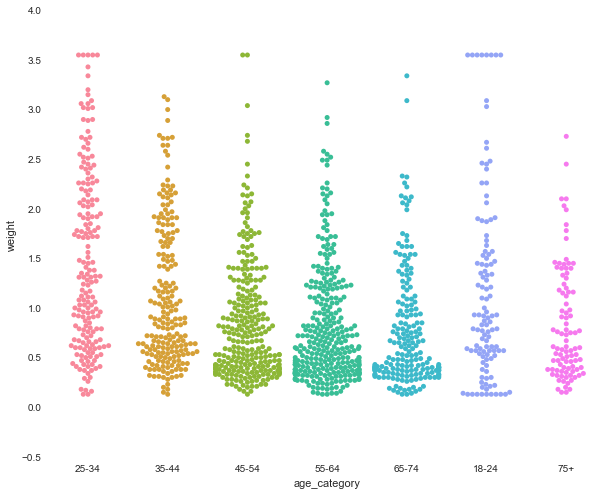

In [9]:
sns.swarmplot(x="age_category", y="weight", data=new_surveys);

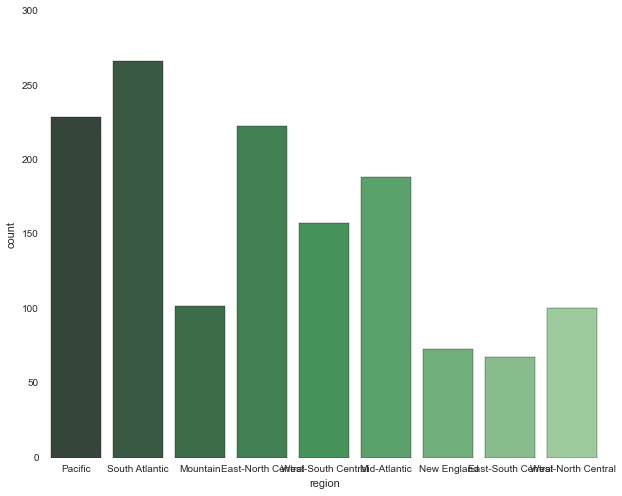

In [10]:
sns.countplot(x="region", data=new_surveys, palette="Greens_d")

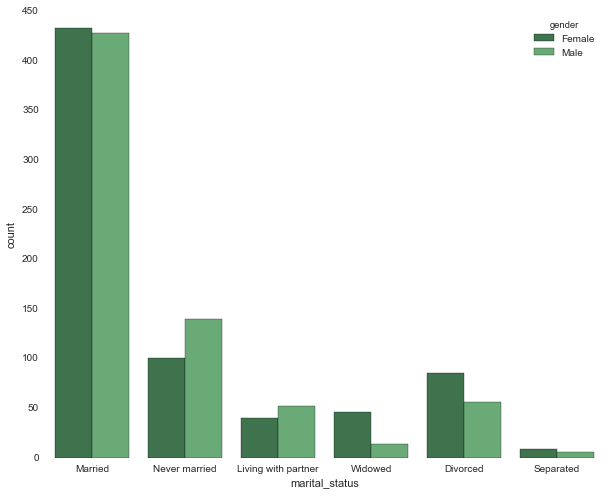

In [11]:
sns.countplot(x="marital_status", hue="gender", data=new_surveys, palette="Greens_d")

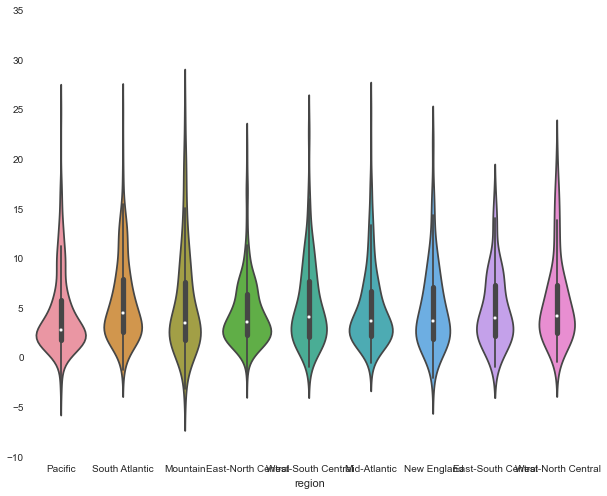

In [12]:
sns.violinplot(x=new_surveys.region, y=new_surveys.i_develop_strong_emotions_toward_people_i_can_rely_on_num*new_surveys.weight);

In [178]:
import json
TEMPLATE = '''
var {name} = new Datamap({{
  scope: 'usa',
  element: document.getElementById('{name}'),
  geographyConfig: {{
    highlightBorderColor: '#bada55',
    popupTemplate: function(geography, data) {{
      return '<div class="hoverinfo"><strong>' + geography.properties.name + '</strong>' +
          '<br />Strongly Agree: ' +  data.stronglyAgree + 
          '<br />Agree: ' +  data.agree + 
          '<br />Somewhat agree: ' + data.somewhatAgree +
          '<br />Neither agree nor disagree: ' + data.neitherAgreeNorDisagree +
          '<br />Somewhat disagree: ' + data.somewhatDisagree +
          '<br />Disagree: ' + data.disagree +
          '<br />Strongly disagree: ' + data.stronglyDisagree +
          '<br />Refused: ' + data.refused + ' </div>'
    }},
    highlightBorderWidth: 3
  }},

  fills: {{
  'Strongly Agree': '#5BC3F7',
  'Agree': '#51B9ED',
  'Somewhat agree': '#5185ED',
  'Neither agree nor disagree': '#6B51ED',
  'Somewhat disagree': '#FFD5A1',
  'Disagree ': '#FFC18D', 
  'Strongly disagree': '#F78F5B',
  'Refused ': '#E37B47',     
  defaultFill: '#C55D29'
}},
data:{data}
}});
{name}.labels();
'''

In [179]:
def make_d3_code(question, key):
    q = question
    
    # gather states 
    states = [ s for s in set(new_surveys['state'].values) if str(s)!='nan']
    
    # start output dict 
    data = {}
    
    # create dictionary for each state with results 
    for s in states:
        state_dict = {}
        
        # filter values for state surveys 
        df_state = new_surveys[new_surveys['state'] == s]
        ind = df_state[q].value_counts().index
        vals = df_state[q].value_counts().values
        ind_vals = zip(ind, vals)
        fillkey = ind[0]
        state_dict[s] = {'fillKey':fillkey}
        
        # create key-value for survey answers 
        mapped_ind = map(lambda x: {key[x[0]]:x[1]},zip(ind,vals))
        for k in mapped_ind:
            state_dict[s].update(k)
        
        # fill missing values with zeros 
        missing = [ k for k in key.values() if k not in state_dict[s] ]
        for m in missing:
            state_dict[s].update({m:0})
        data[s] = state_dict[s]
    return data

In [180]:
key = {
    'Strongly agree':'stronglyAgree'
   , 'Agree':'agree'
   , 'Somewhat agree':'somewhatAgree'
   , 'Neither agree nor disagree':'neitherAgreeNorDisagree'
   , 'Somewhat disagree':'somewhatDisagree'
   , 'Disagree':'disagree'
   , 'Strongly disagree':'stronglyDisagree'
   , 'Refused':'refused'
}
i_develop_strong_emotions_toward_people_i_can_rely_on = \
    make_d3_code('i_develop_strong_emotions_toward_people_i_can_rely_on', key)
parents_should_empower_children_as_much_as_possible_so_that_they_may_follow_their_dreams = \
    make_d3_code('parents_should_empower_children_as_much_as_possible_so_that_they_may_follow_their_dreams', key)
moral_standards_should_be_seen_as_individualistic_what_one_person_considers_to_be_moral_may_be_judged_as_immoral_by_another_person = \
    make_d3_code('moral_standards_should_be_seen_as_individualistic_what_one_person_considers_to_be_moral_may_be_judged_as_immoral_by_another_person', key)

In [181]:
q1_d3 = TEMPLATE.format(name='resultmap_q1'
                        , data=json.dumps(i_develop_strong_emotions_toward_people_i_can_rely_on))
q2_d3 = TEMPLATE.format(name='resultmap_q2'
                        , data=json.dumps(parents_should_empower_children_as_much_as_possible_so_that_they_may_follow_their_dreams))
q3_d3 = TEMPLATE.format(name='resultmap_q3'
                        , data=json.dumps(moral_standards_should_be_seen_as_individualistic_what_one_person_considers_to_be_moral_may_be_judged_as_immoral_by_another_person))

In [182]:
with open('q1_d3.txt','w') as w:
    print >>w, q1_d3
with open('q2_d3.txt','w') as w:
    print >>w, q2_d3
with open('q3_d3.txt','w') as w:
    print >>w, q3_d3